## Business Understanding

I am to examine the data, as a Data Scioentist. the King County House Sales dataset to be specific, which is in the kc_house_data.csv document.I will be attempting to find the major contributors to house pricing {***USD***}  in a northwestern county.

I will be using several models of linear regression and multiple linear regresions.

In [1]:
# Importing the relevant libraries.

import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt

%matplotlib inline 

import seaborn as sns


In [2]:
# loading the data into the dataframe kc.
# index col is set to zero to ensure the id column is used as the index.

kc = pd.read_csv('kc_house_data.csv', index_col=0)
kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Dataframe exploration

In [80]:
#let us define some functions to get relevant information from the Data Frames.

#get value types of entries per column.

def get_value(data,col_name):
    
    return data[col_name].value_counts()

#get general information for the whole data frame.

def get_info(data):
    info_ = data.info()
    return info_


# Defining a function to get the percentages of missing values.
def missing_values(data):
    miss_vals = data.isnull().sum().sort_values(ascending=False)
    
    #percentages
    percentages = (((data.isnull().sum()) / len(data)).sort_values(ascending=False))*100
    
    #create dataframe of missing values
    
    missing_df = pd.DataFrame({"Total missing values": miss_vals, 'Percentage(%)':percentages})
    
    #if percentage == 0 implies no missing values
    missing_df.drop(missing_df[missing_df['Percentage(%)']==0].index, inplace = True)
    
    return missing_df

# defining a function to look for duplicates from the DataFrames.

def get_duplicate(data):
    duplicate = data.duplicated().value_counts()
    return duplicate

#define a function that returns the unique values in a column.

def get_unique(data,column):
    return data[column].unique()


#define a function that returns a list of column names with potential descrete data based of data type

def descrete(data):
    descrete_var_col_names = []
    categoricals = kc.select_dtypes("object")

    for col in categoricals:
        descrete_var_col_names.append(col)
    return descrete_var_col_names


# let us define a function that separates  categorical data from continuous data based on unique value counts.

def distinguish(data):
    dependent = {}
    categorical = {}
    continuous = {}
    check = descrete(data)
    
    for col in list(data.columns):
        
        if len(data[col].unique()) > 100 and col != 'price':
            continuous[col] = len(data[col].unique())
            
        elif col == 'price':
            dependent[col] = len(data[col].unique())
            
        else:
            categorical[col] = len(data[col].unique())
    
    
    for x in check:
        if x in continuous:            
            continuous.pop(x)
            
    for x in check:            
        if x not in categorical:
            categorical[x] = len(data[x].unique())
        
            
            
    return categorical,continuous,dependent


In [76]:
'date' not in categorical

True

In [8]:
# getting a summary or general info of the data frame

get_info(kc)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [4]:
# Inspecting the data types found in the dataframe kc.

kc.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

The kc dataframe comprises of 3 dtypes;<br>

   1. **dtype('O')** <br>
        t means: 'O' (Python) objects. Source.<br>
   1. **dtype('float64')**<br>
        Python float values are represented as 64-bit double-precision values.<br>
   1. **dtype('int64')**<br>
        The type int64 tells us that Python is storing each value within this column as a 64 bit integer.

In [74]:
# potential descrete variables.
descrete(kc)

['date', 'waterfront', 'view', 'condition', 'grade', 'sqft_basement']

In [81]:
categorical,continuous,dependent= distinguish(kc)
categorical.keys()

dict_keys(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_renovated', 'zipcode', 'date', 'sqft_basement'])

In [82]:
list(continuous.keys())

['sqft_living',
 'sqft_lot',
 'sqft_above',
 'yr_built',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

All i have done is separate the data into categorical and continuous data based on each columns uniqe value counts. I set a limit of 100 , in that all columns with a data count less than 100 are placed in a dictionary named categorical followed by checking that the column names selected by the decrete function are included ;<br>

        * bedrooms <br>
        * bathrooms<br>
        * floors<br>
        * waterfront<br>
        * view<br>
        * condition<br>
        * grade<br>
        * yr_renovated<br>
        * zipcode
        * date
        * sqft_basement
   
<br>
Where as the continuous are stored in continuous. but without looking at there scatter plots there is no way of knowing whether the continuous column names are truly continuous variables.

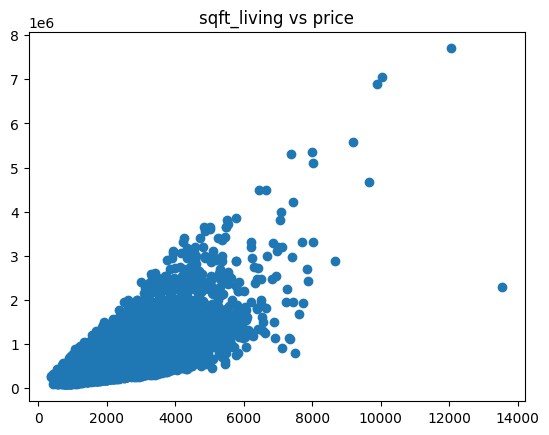

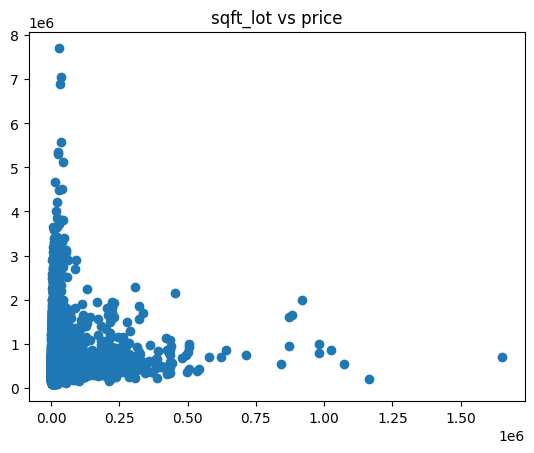

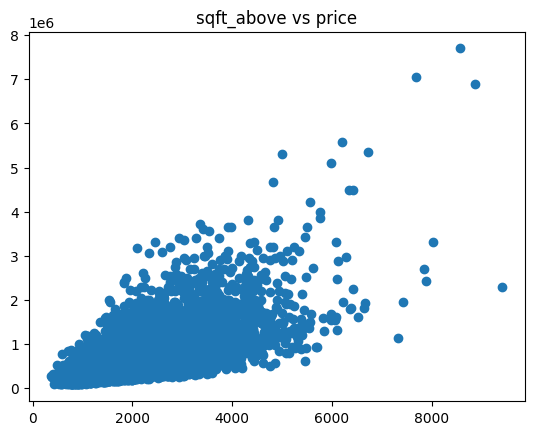

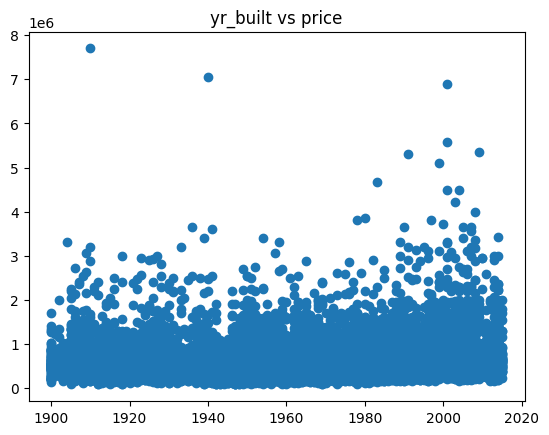

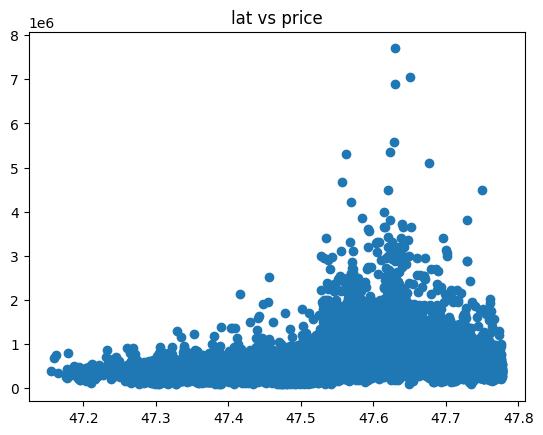

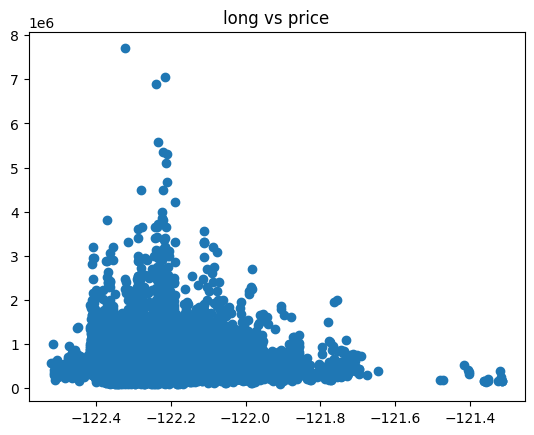

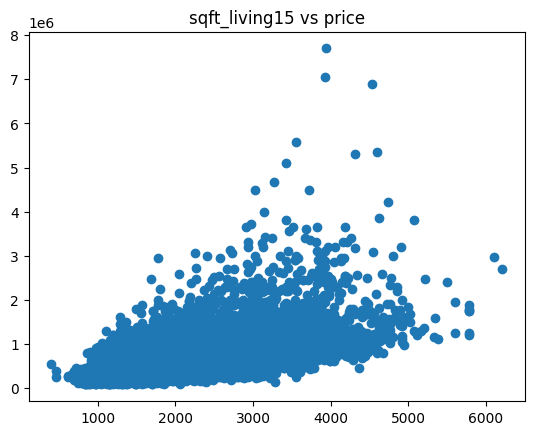

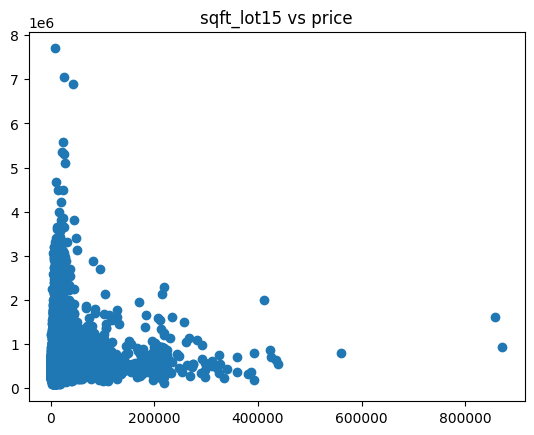

In [84]:
# Plotting scatter plots to ensure  that all continuous elements are truly continuous

# defining variable columns with the continuous elements from the earlier function.
columns = list(continuous.keys())

y_col = "price"
x_columns = columns

# a for loop to loop through all the x_columns.
for x_col in x_columns:
    fig,ax = plt.subplots()
    ax.scatter(y = kc[y_col], x = kc[x_col])   
    ax.set_title(f"{x_col} vs {y_col}");

From the above scatter plots the following do not fit a linear relationship.

 > sqft_lot15<br>
 > lat<br>
 > long<br>
 > yr_built<br>
 > sqft_lot<br>

In [92]:
# purifying the continuous dictionary
continuous.pop('sqft_lot15')
continuous.pop('lat')
continuous.pop('long')
continuous.pop('yr_built')
continuous.pop('sqft_lot')
continuous

{'sqft_living': 1034,
 'sqft_lot': 9776,
 'sqft_above': 942,
 'yr_built': 116,
 'lat': 5033,
 'long': 751,
 'sqft_living15': 777}

In [9]:
#looking for any missing values
missing_values(kc)


,Total missing values,Percentage(%)
yr_renovated,3842,17.789508
waterfront,2376,11.001528
view,63,0.291707


### 3 columns observed with missing data 


In [10]:
# checking for duplicates on the dataframe.
get_duplicate(kc)

False    21597
dtype: int64

In [97]:
# Checking the correlation the dataframe kc has with price 
# to find the independent variables with the strongest correlation using the selected continuous variable

kc[list(continuous.keys())].corrwith(kc['price']).sort_values(ascending=False)

sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
dtype: float64

### Data Understanding of the King County House Sales dataset.

It has been loaded in with pandas as kc. Short for King County.

It has 21597 rows and 20 columns.

No duplicate rows were observed.

Only 3 columns were observed with missing values;

    > yr_renovated  17.7% missing

    > waterfront    11.0% missing

    > view          0.29% missing
The kc column with the strongest correlation is the **sqft_living** (*Square footage of living space in the home*)     with a correlation of **0.701917**. This shall be used for the baseline model.


# Data Preparation of the King County House Sales dataset.

Only part i had to clean up is the missing value which i shall drop the rows with the missing value as they are not mor than half or even a quarter of the whole dataset.

In [100]:
# dealing with the missing values.

# since the percent of missing values is low and i may use there column
# i will drop the rows with the missing values.

kc.dropna(inplace = True)

# rechecking missing values

missing_values(kc)

,Total missing values,Percentage(%)


In [101]:
kc.shape

(15762, 20)

In [102]:
kc_cont = kc[list(continuous.keys())]
kc_cont

,sqft_living,sqft_above,sqft_living15
id,,,
6414100192,2570,2170,1690
2487200875,1960,1050,1360
1954400510,1680,1680,1800
7237550310,5420,3890,4760
1321400060,1715,1715,2238
...,...,...,...
2997800021,1310,1180,1330
263000018,1530,1530,1530
6600060120,2310,2310,1830


# Modeling 
## Baseline model

In [103]:
# Checking the correlation the dataframe kc has with price after dropping the rows. 
# to find the independent variables with the strongest correlation

kc_cont.corrwith(kc['price']).sort_values(ascending=False)

sqft_living      0.706189
sqft_above       0.612014
sqft_living15    0.581572
dtype: float64

The **sqft_living** is still the column with the highest correlation with price.

In [105]:
# for the baseline lets start by definin y the dependent variable and X the independent variable.

y = kc['price']
X_baseline = kc_cont[['sqft_living']]

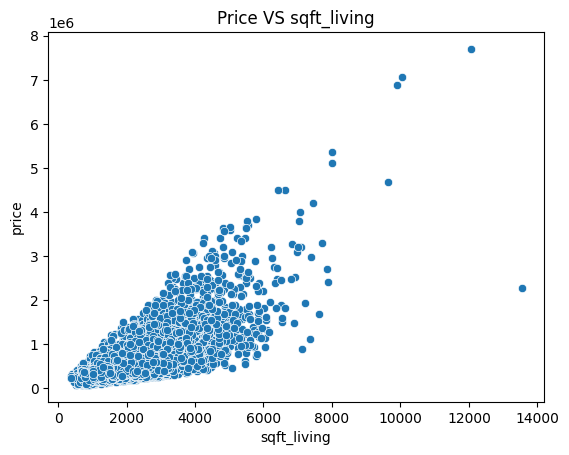

In [108]:
# Let us inspect its scatter plot to ensure it has a linear relationship with price.

sns.scatterplot(x = kc['sqft_living'],y=kc['price']).set(title='Price VS sqft_living');


The scatter plot depicts a **linear relationship**.

In [117]:
# using the Ordinary Least Method from stats model we can fit our model.

baseline_model = sm.OLS(endog=y, exog=sm.add_constant(X_baseline))
result_baseline = baseline_model.fit()

# Let us print out the summary for the model

print(result_baseline.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 1.568e+04
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:24:02   Log-Likelihood:            -2.1911e+05
No. Observations:               15762   AIC:                         4.382e+05
Df Residuals:                   15760   BIC:                         4.382e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.516e+04   5205.744    -10.597      

### Baseline Model Intepretation.
<br>
* Overall the model and coefficients are **statistically significant**, with all *p-values* well below a standard alpha of **0.05**.
<br>

* The **R-squared** value is about 0.499 i.e. **50%** of the variance in the target variable can be explained by sqft_living.
<br>

* The intercept is about -5.516e+04 i.e. **-55160 USD**, meaning that if one wanted a house with a square foot of living space of  0, they would expect a price of about -55160 USD.but this can be ignored as a house with 0 sqft of living room cant exist outside the mathematical realm.
<br>

* The sqft_living coefficient is about **290**, meaning that for each additional 1 USD on price of the house we have an additional  square feet of living of about 290 sqft.

In [113]:
kc[list(continuous.keys())]

,sqft_living,sqft_above,sqft_living15
id,,,
6414100192,2570,2170,1690
2487200875,1960,1050,1360
1954400510,1680,1680,1800
7237550310,5420,3890,4760
1321400060,1715,1715,2238
...,...,...,...
2997800021,1310,1180,1330
263000018,1530,1530,1530
6600060120,2310,2310,1830


In [114]:
list(continuous.keys())

['sqft_living', 'sqft_above', 'sqft_living15']

## Model Multilinear model

In [116]:
# define a variable to hold the dataset but only for the continuous variables.
multi = list(continuous.keys())

X_multilinear = kc[multi]

In [118]:
# using the Ordinary Least Method from stats model we can fit our model.

Multilinear_model = sm.OLS(endog=y, exog=sm.add_constant(X_multilinear))
result_multilinear = Multilinear_model.fit()

# Let us print out the summary for the model

print(result_multilinear.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     5356.
Date:                Wed, 28 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:25:36   Log-Likelihood:            -2.1901e+05
No. Observations:               15762   AIC:                         4.380e+05
Df Residuals:                   15758   BIC:                         4.381e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.046e+05   6422.564    -16.290

Multilinear Model Intepretation.

* Overall the model and coefficients are **statistically significant**, with all *p-values* well below a standard alpha of **0.05**.

* The Adj. R-squared value is about 0.505 i.e. 51% of the variance in the target variable can be explained by sqft_living.

* The intercept is about -1.046e+05 i.e. -104600 USD, meaning that if one wanted a house with a square foot of living space of 0, they would expect a price of about -55160 USD.but this can be ignored as a house with 0 sqft of living room cant exist outside the mathematical realm.

* The sqft_living coefficient is about 280, meaning that for each additional 1 USD on price of the house we have an additional square feet of living of about 280 sqft.

* The sqft_above coefficient is about -30, meaning that for each additional 1 USD on price of the house we have an additional square feet of above of about -30 sqft.

* The sqft_living coefficient is about 70, meaning that for each additional 1 USD on price of the house we have an additional square feet of living of about 70 sqft.

